## Carga de librerías necesarias y dataset


In [633]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler



df = pd.read_csv('atp_tennis.csv')


## Exploración de datos 

In [634]:
print(df.head())

                           Tournament        Date         Series    Court  \
0  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
1  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
2  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
3  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
4  Australian Hardcourt Championships  2000-01-03  International  Outdoor   

  Surface      Round  Best of        Player_1       Player_2       Winner  \
0    Hard  1st Round        3      Dosedel S.    Ljubicic I.   Dosedel S.   
1    Hard  1st Round        3      Clement A.     Enqvist T.   Enqvist T.   
2    Hard  1st Round        3       Escude N.  Baccanello P.    Escude N.   
3    Hard  1st Round        3  Knippschild J.     Federer R.   Federer R.   
4    Hard  1st Round        3     Fromberg R.  Woodbridge T.  Fromberg R.   

   Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2        Score  
0      63    

In [635]:
print("\nInformación del dataset:")
print(df.info())

print("\nDimensiones del dataset:", df.shape)



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64470 entries, 0 to 64469
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  64470 non-null  object 
 1   Date        64470 non-null  object 
 2   Series      64470 non-null  object 
 3   Court       64470 non-null  object 
 4   Surface     64470 non-null  object 
 5   Round       64470 non-null  object 
 6   Best of     64470 non-null  int64  
 7   Player_1    64470 non-null  object 
 8   Player_2    64470 non-null  object 
 9   Winner      64470 non-null  object 
 10  Rank_1      64470 non-null  int64  
 11  Rank_2      64470 non-null  int64  
 12  Pts_1       64470 non-null  int64  
 13  Pts_2       64470 non-null  int64  
 14  Odd_1       64470 non-null  float64
 15  Odd_2       64470 non-null  float64
 16  Score       64470 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.4+ MB
None

Dimensiones del d

In [636]:
print(df.describe())

            Best of        Rank_1        Rank_2         Pts_1         Pts_2  \
count  64470.000000  64470.000000  64470.000000  64470.000000  64470.000000   
mean       3.379215     75.934124     75.578548   1116.433613   1121.782162   
std        0.783987    100.827774    101.095891   1714.902932   1738.893680   
min        3.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%        3.000000     24.000000     24.000000     62.000000     63.000000   
50%        3.000000     53.000000     54.000000    688.000000    688.000000   
75%        3.000000     92.000000     92.000000   1225.000000   1230.000000   
max        5.000000   3390.000000   4915.000000  16950.000000  16950.000000   

              Odd_1         Odd_2  
count  64470.000000  64470.000000  
mean       2.407991      2.405957  
std        2.662644      2.646038  
min       -1.000000     -1.000000  
25%        1.330000      1.330000  
50%        1.730000      1.800000  
75%        2.750000      2.750000  


### Limpieza

In [637]:
# Valores Faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [638]:
limpieza=['Court', 'Series']
df.drop(columns=limpieza, inplace=True)
df = df.dropna()
print(df.columns)

Index(['Tournament', 'Date', 'Surface', 'Round', 'Best of', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1',
       'Odd_2', 'Score'],
      dtype='object')


In [639]:
df = df.iloc[15653:].reset_index(drop=True)  
print(df.head)

<bound method NDFrame.head of                              Tournament        Date Surface          Round  \
0                          Swedish Open  2005-07-04    Clay      1st Round   
1                          Swedish Open  2005-07-05    Clay      1st Round   
2                          Swedish Open  2005-07-05    Clay      1st Round   
3                          Swedish Open  2005-07-05    Clay      1st Round   
4                          Swedish Open  2005-07-05    Clay      1st Round   
...                                 ...         ...     ...            ...   
48812  ABN AMRO World Tennis Tournament  2025-02-07    Hard  Quarterfinals   
48813  ABN AMRO World Tennis Tournament  2025-02-07    Hard  Quarterfinals   
48814  ABN AMRO World Tennis Tournament  2025-02-08    Hard     Semifinals   
48815  ABN AMRO World Tennis Tournament  2025-02-08    Hard     Semifinals   
48816  ABN AMRO World Tennis Tournament  2025-02-09    Hard      The Final   

       Best of       Player_1    

### Visualizaciones

array([[<Axes: title={'center': 'Rank_1'}>,
        <Axes: title={'center': 'Rank_2'}>],
       [<Axes: title={'center': 'Pts_1'}>,
        <Axes: title={'center': 'Pts_2'}>],
       [<Axes: title={'center': 'Odd_1'}>,
        <Axes: title={'center': 'Odd_2'}>]], dtype=object)

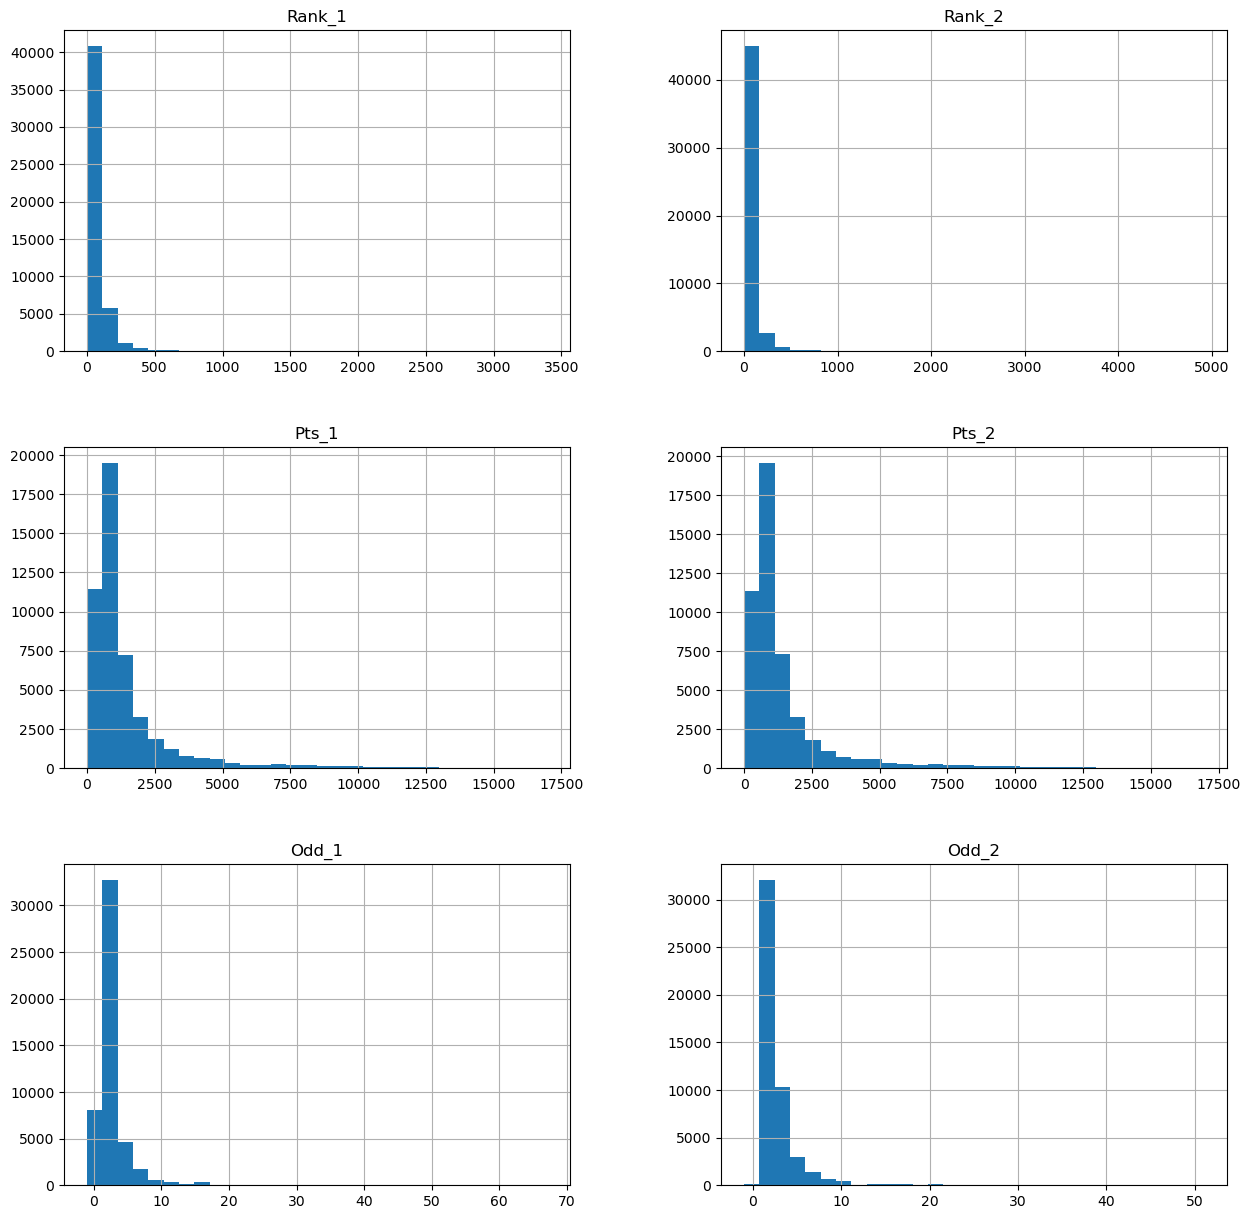

In [640]:
df_visualizacion = df[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 
                        ]]

df_visualizacion.hist(figsize=(15, 15), bins=30)

C:\Users\Mayco\AppData\Local\Temp\ipykernel_40684\994185023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Victorias', y='Jugador', data=top_15_jugadores, palette='viridis')


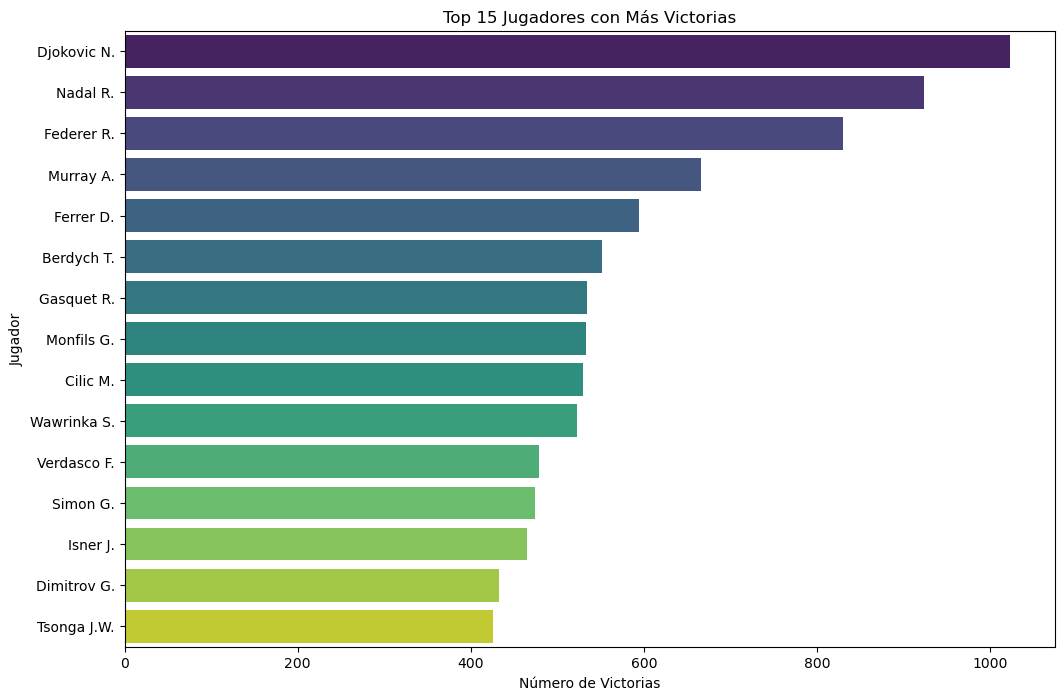

        Jugador  Victorias
0   Djokovic N.       1023
1      Nadal R.        923
2    Federer R.        830
3     Murray A.        666
4     Ferrer D.        594
5    Berdych T.        551
6    Gasquet R.        534
7    Monfils G.        533
8      Cilic M.        529
9   Wawrinka S.        523
10  Verdasco F.        479
11     Simon G.        474
12     Isner J.        465
13  Dimitrov G.        433
15  Tsonga J.W.        426


In [641]:
# determianr que tenistas han cosechado mas victorias
victorias = df['Winner'].value_counts().reset_index()
victorias.columns = ['Jugador', 'Victorias']

victorias = victorias.sort_values(by='Victorias', ascending=False)

top_15_jugadores = victorias.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Victorias', y='Jugador', data=top_15_jugadores, palette='viridis')
plt.title('Top 15 Jugadores con Más Victorias')
plt.xlabel('Número de Victorias')
plt.ylabel('Jugador')
plt.show()

print(top_15_jugadores)

## Feature Engineering

In [642]:
df['rank_diff'] = df['Rank_1'] - df['Rank_2']
df['pts_diff'] = df['Pts_1'] - df['Pts_2']
df['odds_diff'] = df['Odd_1'] - df['Odd_2']
df['Ranking_Ganador'] = df.apply(lambda row: row['Rank_1'] if row['Winner'] == row['Player_1'] else row['Rank_2'], axis=1)

df['Gano_el_que_tenia_mas_puntos'] = df.apply(
    lambda row: (row['Pts_1'] > row['Pts_2'] and row['Winner'] == row['Player_1']) or 
                (row['Pts_2'] > row['Pts_1'] and row['Winner'] == row['Player_2']), 
    axis=1
)

df['Gano_el_que_tenia_menor_odd'] = df.apply(
    lambda row: (row['Odd_1'] < row['Odd_2'] and row['Winner'] == row['Player_1']) or 
                (row['Odd_2'] < row['Odd_1'] and row['Winner'] == row['Player_2']), 
    axis=1
)


# Verificar las nuevas columnas
print(df.head())

     Tournament        Date Surface      Round  Best of       Player_1  \
0  Swedish Open  2005-07-04    Clay  1st Round        3  Ryderstedt M.   
1  Swedish Open  2005-07-05    Clay  1st Round        3     Youzhny M.   
2  Swedish Open  2005-07-05    Clay  1st Round        3      Dlouhy L.   
3  Swedish Open  2005-07-05    Clay  1st Round        3     Berdych T.   
4  Swedish Open  2005-07-05    Clay  1st Round        3     Acasuso J.   

         Player_2          Winner  Rank_1  Rank_2  ...  Pts_2  Odd_1  Odd_2  \
0  Vinciguerra A.  Vinciguerra A.     132     917  ...      9   1.66   2.10   
1      Haehnel J.      Youzhny M.      27     109  ...    391   1.19   4.00   
2    Ferrero J.C.    Ferrero J.C.     136      31  ...   1150   7.00   1.07   
3          Kim K.      Berdych T.      42      71  ...    541   1.19   4.00   
4      Almagro N.      Almagro N.      44      88  ...    469   1.39   2.75   

     Score rank_diff  pts_diff  odds_diff  Ranking_Ganador  \
0  3-6 1-6      -7

In [643]:
#Profiling Report of ATP dataset, using ydata-profiling

#profile = ProfileReport(df,title="ATP matches")
#profile.to_file("Atp.html")

### Encoding Variables categoricas

In [644]:
# Inicializar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Deja solo una columna (3 → 0, 5 → 1)

# Aplicar One-Hot Encoding
encoded_array = encoder.fit_transform(df[['Best of']])

# Agregar la columna transformada al DataFrame
df['Best of'] = encoded_array.astype(int)  # Convertir los valores flotantes a enteros

df['Gano_el_que_tenia_mas_puntos'] = df['Gano_el_que_tenia_mas_puntos'].astype(int)
df['Gano_el_que_tenia_menor_odd'] = df['Gano_el_que_tenia_menor_odd'].astype(int)

df

,Tournament,Date,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,...,Pts_2,Odd_1,Odd_2,Score,rank_diff,pts_diff,odds_diff,Ranking_Ganador,Gano_el_que_tenia_mas_puntos,Gano_el_que_tenia_menor_odd
0,Swedish Open,2005-07-04,Clay,1st Round,0,Ryderstedt M.,Vinciguerra A.,Vinciguerra A.,132,917,...,9,1.66,2.10,3-6 1-6,-785,317,-0.44,917,0,0
1,Swedish Open,2005-07-05,Clay,1st Round,0,Youzhny M.,Haehnel J.,Youzhny M.,27,109,...,391,1.19,4.00,6-1 6-1,-82,809,-2.81,27,1,1
2,Swedish Open,2005-07-05,Clay,1st Round,0,Dlouhy L.,Ferrero J.C.,Ferrero J.C.,136,31,...,1150,7.00,1.07,4-6 1-6,105,-835,5.93,31,1,1
3,Swedish Open,2005-07-05,Clay,1st Round,0,Berdych T.,Kim K.,Berdych T.,42,71,...,541,1.19,4.00,6-2 6-3,-29,270,-2.81,42,1,1
4,Swedish Open,2005-07-05,Clay,1st Round,0,Acasuso J.,Almagro N.,Almagro N.,44,88,...,469,1.39,2.75,4-6 1-6,-44,312,-1.36,88,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48812,ABN AMRO World Tennis Tournament,2025-02-07,Hard,Quarterfinals,0,Martinez P.,Alcaraz C.,Alcaraz C.,44,3,...,7010,11.00,1.05,2-6 1-6,41,-5805,9.95,3,1,1
48813,ABN AMRO World Tennis Tournament,2025-02-07,Hard,Quarterfinals,0,Hurkacz H.,Rublev A.,Hurkacz H.,21,10,...,3220,2.10,1.73,6-7 6-3 6-4,11,-1015,0.37,21,0,0
48814,ABN AMRO World Tennis Tournament,2025-02-08,Hard,Semifinals,0,Bellucci M.,De Minaur A.,De Minaur A.,92,8,...,3735,4.50,1.17,1-6 2-6,84,-3111,3.33,8,1,1
48815,ABN AMRO World Tennis Tournament,2025-02-08,Hard,Semifinals,0,Alcaraz C.,Hurkacz H.,Alcaraz C.,3,21,...,2205,1.25,4.00,6-4 6-7 6-3,-18,4805,-2.75,3,1,1


In [645]:
# Mapeo de valores para la variable Surface
surface_mapping = {'Hard': 2, 'Clay': 1, 'Grass': 0}

# Aplicar el mapeo a la columna Surface
df['Surface'] = df['Surface'].map(surface_mapping)

# Mostrar los primeros registros para verificar el cambio
print(df[['Surface']].head())

   Surface
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0


In [646]:
# Crear una nueva variable de resultado binaria
df['Winner_binary'] = (df['Winner'] == df['Player_1']).astype(int)

# Verificar la nueva variable
print(df[['Player_1', 'Player_2', 'Winner', 'Winner_binary']].head())

# Eliminar la columna original Winner (opcional)
df.drop(columns=['Winner'], inplace=True)

        Player_1        Player_2          Winner  Winner_binary
0  Ryderstedt M.  Vinciguerra A.  Vinciguerra A.              0
1     Youzhny M.      Haehnel J.      Youzhny M.              1
2      Dlouhy L.    Ferrero J.C.    Ferrero J.C.              0
3     Berdych T.          Kim K.      Berdych T.              1
4     Acasuso J.      Almagro N.      Almagro N.              0


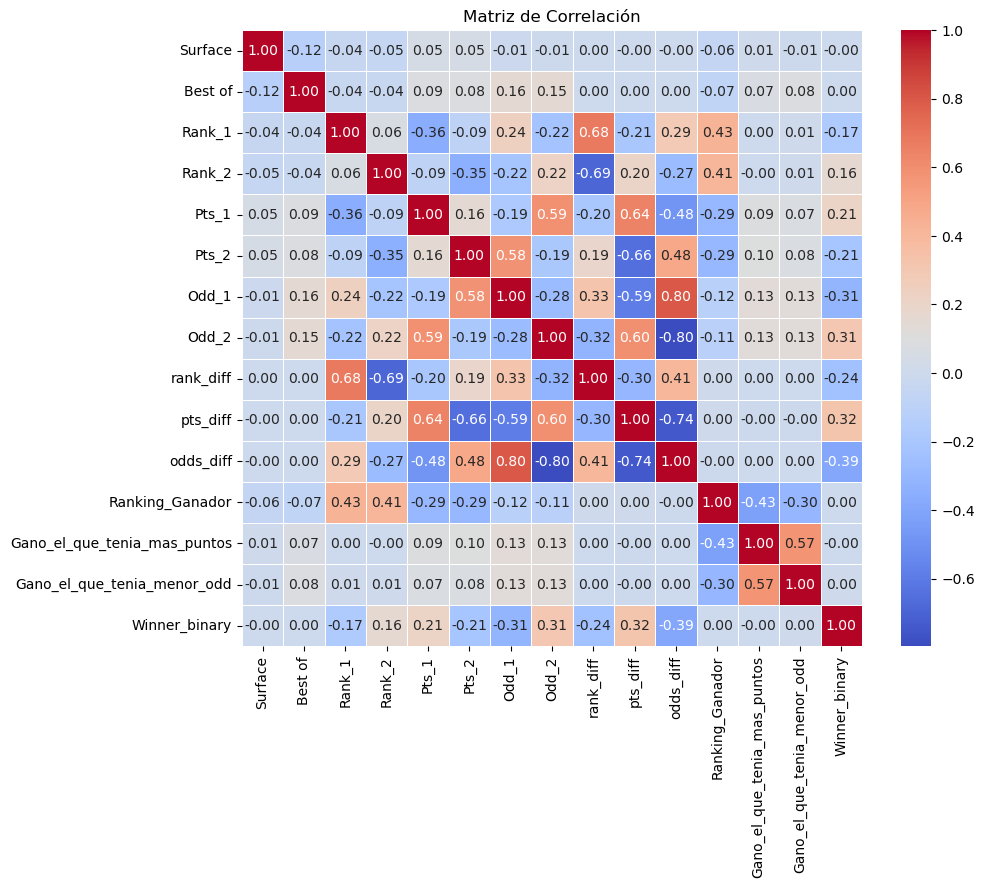

In [647]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [648]:
def plot_normality(data, variable):
    plt.figure(figsize=(12, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], kde=True, color='blue')
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # QQ Plot
    plt.subplot(1, 2, 2)
    sm.qqplot(data[variable], line='s', color='red')
    plt.title(f'QQ Plot de {variable}')
    
    plt.tight_layout()
    plt.show()

# Función para realizar pruebas de normalidad
def test_normality(data, variable):
    print(f"Pruebas de normalidad para {variable}:")
    
    # D’Agostino’s K²
    k2, p_value = stats.normaltest(data[variable])
    print(f"D’Agostino’s K²: estadístico = {k2:.2f}, p-value = {p_value:.4f}")
    
    # Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data[variable])
    print(f"Shapiro-Wilk: estadístico = {shapiro_stat:.2f}, p-value = {shapiro_p:.4f}")
    
    # Anderson-Darling
    anderson_result = stats.anderson(data[variable], dist='norm')
    print(f"Anderson-Darling: estadístico = {anderson_result.statistic:.2f}")
    for i in range(len(anderson_result.critical_values)):
        sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        if anderson_result.statistic < cv:
            print(f"Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"Al nivel de significancia {sl}%, los datos NO parecen normales.")

            
#variables = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']

#for var in variables:
    #plot_normality(df, var)
    #test_normality(df, var)

## Feature Scaling

In [649]:
df[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 
          'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd', 'Winner_binary']]

,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Gano_el_que_tenia_mas_puntos,Gano_el_que_tenia_menor_odd,Winner_binary
0,132,917,326,9,1.66,2.10,0,0,0
1,27,109,1200,391,1.19,4.00,1,1,1
2,136,31,315,1150,7.00,1.07,1,1,0
3,42,71,811,541,1.19,4.00,1,1,1
4,44,88,781,469,1.39,2.75,0,0,0
...,...,...,...,...,...,...,...,...,...
48812,44,3,1205,7010,11.00,1.05,1,1,0
48813,21,10,2205,3220,2.10,1.73,0,0,1
48814,92,8,624,3735,4.50,1.17,1,1,0
48815,3,21,7010,2205,1.25,4.00,1,1,1


In [650]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Surface', 'Best of', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'rank_diff', 'pts_diff', 'odds_diff', 'Ranking_Ganador', 'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd']

# Crear el escalador
scaler = MinMaxScaler()

# Aplicar la normalización a las variables numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verificar el resultado
print(df[numeric_columns].head())

   Surface  Best of    Rank_1    Rank_2     Pts_1     Pts_2     Odd_1  \
0      0.5      0.0  0.038654  0.186406  0.019175  0.000590  0.039118   
1      0.5      0.0  0.007672  0.021978  0.070742  0.023125  0.032206   
2      0.5      0.0  0.039835  0.006105  0.018526  0.067902  0.117647   
3      0.5      0.0  0.012098  0.014245  0.047790  0.031975  0.032206   
4      0.5      0.0  0.012688  0.017705  0.046020  0.027727  0.035147   

      Odd_2  rank_diff  pts_diff  odds_diff  Ranking_Ganador  \
0  0.059615   0.497588  0.511446   0.427241         0.484913   
1  0.096154   0.582369  0.526284   0.406810         0.013764   
2  0.039808   0.604920  0.476702   0.482155         0.015881   
3  0.096154   0.588760  0.510028   0.406810         0.021705   
4  0.072115   0.586951  0.511295   0.419310         0.046056   

   Gano_el_que_tenia_mas_puntos  Gano_el_que_tenia_menor_odd  
0                           0.0                          0.0  
1                           1.0                   

In [651]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Aplicar la estandarización a las variables numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verificar el resultado
print(df[numeric_columns].head())

    Surface   Best of    Rank_1    Rank_2     Pts_1     Pts_2     Odd_1  \
0 -0.666388 -0.486956  0.563047  8.195087 -0.627127 -0.791842 -0.368162   
1 -0.666388 -0.486956 -0.476217  0.333406 -0.149973 -0.586461 -0.534738   
2 -0.666388 -0.486956  0.602638 -0.425518 -0.633133 -0.178386  1.524422   
3 -0.666388 -0.486956 -0.327751 -0.036326 -0.362345 -0.505814 -0.534738   
4 -0.666388 -0.486956 -0.307955  0.129080 -0.378723 -0.544524 -0.463855   

      Odd_2  rank_diff  pts_diff  odds_diff  Ranking_Ganador  \
0 -0.211946  -5.634638  0.135248  -0.099159        11.769556   
1  0.466488  -0.591029  0.340570  -0.627011        -0.428940   
2 -0.579729   0.750586 -0.345507   1.319581        -0.374116   
3  0.466488  -0.210785  0.115634  -0.627011        -0.223348   
4  0.020150  -0.318401  0.133161  -0.304064         0.407136   

   Gano_el_que_tenia_mas_puntos  Gano_el_que_tenia_menor_odd  
0                     -1.381501                    -1.480790  
1                      0.723851       

#### Establecer un baseline

In [652]:
df['Ganó_el_que_tenia_ranking_mas_alto'] = df.apply(lambda row: 1 if row['Rank_1'] < row['Rank_2'] else 0, axis=1)
accuracy_baseline = (df['Ganó_el_que_tenia_ranking_mas_alto'] == df['Winner_binary']).mean()
print(f"Accuracy del Baseline (Mejor Ranking): {accuracy_baseline:.2f}")

Accuracy del Baseline (Mejor Ranking): 0.66


## SMOTE - Balanceo de clases 


In [653]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Ranking_Ganador', 'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd', 'Ganó_el_que_tenia_ranking_mas_alto']]
y = df['Winner_binary']

# Dividir los datos en entrenamiento y prueba (antes de aplicar SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el desbalance de clases en el conjunto de entrenamiento
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de aplicar SMOTE
print("\nDistribución de clases después de SMOTE:")
print(y_train_balanced.value_counts())

Distribución de clases antes de SMOTE:
Winner_binary
1    19568
0    19485
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Winner_binary
0    19568
1    19568
Name: count, dtype: int64


No estaba tan desbalanceado 

## Modelos

In [654]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Dividir los datos en conjuntos de entrenamiento y prueba
# Supongamos que X son las variables predictoras y y es la variable de resultado
X = df[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Ranking_Ganador', 'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd', 'Ganó_el_que_tenia_ranking_mas_alto']]
y = df['Winner_binary']  # Variable de resultado (0 o 1)

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [655]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_balanced, y_train_balanced)

SGDClassifier(random_state=42)

In [656]:
# Hacer predicciones con SGDClassifier
y_pred_sgd = sgd.predict(X_test)

In [657]:
# Evaluar SGDClassifier
# Matriz de confusión
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
print("Matriz de Confusión - SGDClassifier:")
print(cm_sgd)

Matriz de Confusión - SGDClassifier:
[[3133 1791]
 [ 853 3987]]


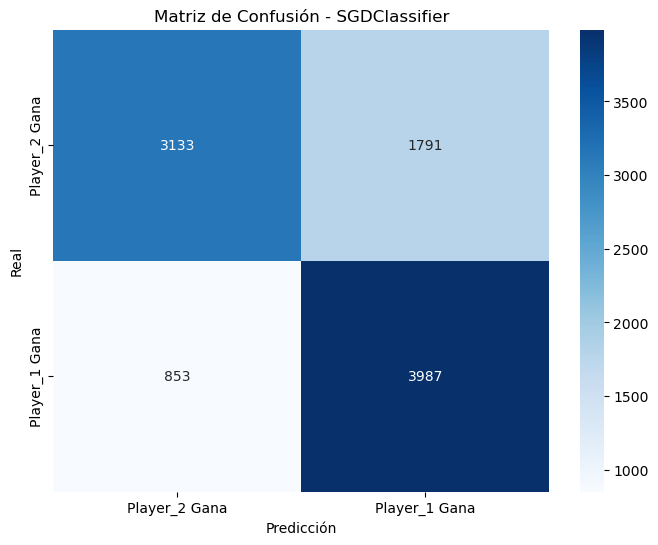

In [658]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', xticklabels=['Player_2 Gana', 'Player_1 Gana'], yticklabels=['Player_2 Gana', 'Player_1 Gana'])
plt.title('Matriz de Confusión - SGDClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [659]:
# Reporte de clasificación
print("\nReporte de Clasificación - SGDClassifier:")
print(classification_report(y_test, y_pred_sgd, target_names=['Player_2 Gana', 'Player_1 Gana']))


Reporte de Clasificación - SGDClassifier:
               precision    recall  f1-score   support

Player_2 Gana       0.79      0.64      0.70      4924
Player_1 Gana       0.69      0.82      0.75      4840

     accuracy                           0.73      9764
    macro avg       0.74      0.73      0.73      9764
 weighted avg       0.74      0.73      0.73      9764



In [660]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = df[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']]
y = df['Winner_binary']  # Variable de resultado (0 o 1)

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [661]:
# Entrenar el modelo KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1000)

In [662]:
# Hacer predicciones con KNeighborsClassifier
y_pred_knn = knn.predict(X_test)

In [663]:
# Evaluar KNeighborsClassifier
# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión - KNeighborsClassifier:")
print(cm_knn)

# Reporte de clasificación
print("\nReporte de Clasificación - KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn, target_names=['Player_2 Gana', 'Player_1 Gana']))

Matriz de Confusión - KNeighborsClassifier:
[[3424 1500]
 [1470 3370]]

Reporte de Clasificación - KNeighborsClassifier:
               precision    recall  f1-score   support

Player_2 Gana       0.70      0.70      0.70      4924
Player_1 Gana       0.69      0.70      0.69      4840

     accuracy                           0.70      9764
    macro avg       0.70      0.70      0.70      9764
 weighted avg       0.70      0.70      0.70      9764



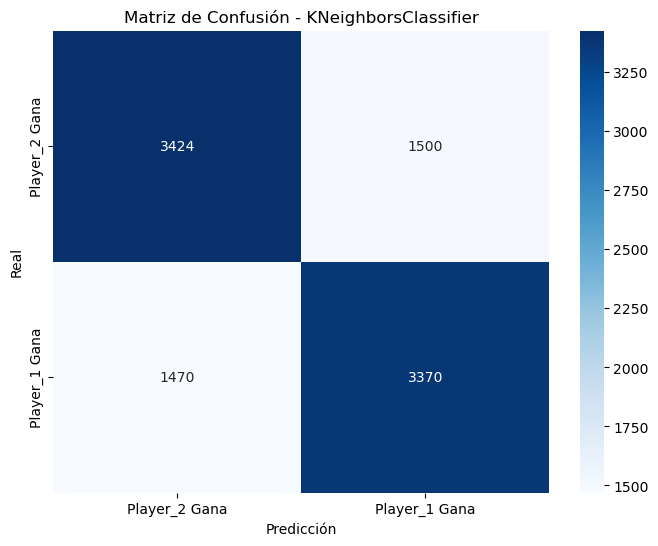

Exactitud de SGDClassifier: 0.73
Exactitud de KNeighborsClassifier: 0.70


In [664]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Player_2 Gana', 'Player_1 Gana'], yticklabels=['Player_2 Gana', 'Player_1 Gana'])
plt.title('Matriz de Confusión - KNeighborsClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Comparar la exactitud (accuracy) de ambos modelos
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Exactitud de SGDClassifier: {accuracy_sgd:.2f}")
print(f"Exactitud de KNeighborsClassifier: {accuracy_knn:.2f}")

### Cross Validation

In [665]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definir modelos
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.001, eta0=0.01, learning_rate='constant')
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Evaluar SGDClassifier con 5-Fold Cross Validation
cv_scores_sgd = cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy')
print("SGDClassifier - Accuracy promedio:", cv_scores_sgd.mean())

# Evaluar KNeighborsClassifier con 5-Fold Cross Validation
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("KNeighborsClassifier - Accuracy promedio:", cv_scores_knn.mean())

SGDClassifier - Accuracy promedio: 0.6964381528987241
KNeighborsClassifier - Accuracy promedio: 0.6523443497310255
